https://gist.github.com/wiseodd/85ad008aef5585cec017f4f1e6d67a02

## Prove GD can work

* Consider 1D function and explain how GD can dec a function. From Taylor Expansion:

$$ f(x + \epsilon) = f(x) + \epsilon f'(x) + O(\epsilon^2) $$

* If you consider only first order approximation only first 2 terms prevails.

* Assume, $\epsilon = -\eta f'(x)$ ie small step moving in -ve direction

$$ f(x - \eta f'(x)) = f(x) - \eta f'^2(x) + O(\eta^2 f'^2(x))$$

* If $\eta$ is small higher order terms vanish and also we know $\eta f'^2(x)$ > 0, bcos $\eta$ + and square f'(x) + implies

$$ f(x - \eta f'(x)) <= f(x) $$

$$ x = x - \eta f'(x) $$

* In same lines, what if $\eta$ is high -> learning rate high implies we cant ignore the higher order terms -> we will increase the f(x) by that higher order amount
$$ f(x - \eta f'(x)) >= f(x) $$

* Thus with higher learning rates, we might not always keep dec the function value through gradients

## 1. GD in action

### 1.1 Convex Case

* Assume objective function $f(x) = x^2 ; f'(x) = 2x$

* We know f(x) is convex -> no local minima & the optimal value of f(x) is at 0

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [64]:
f = lambda x : x**2 # Objective Function
gradf = lambda x : 2*x  # Derivative

def grad_desc(eta, init_val):
    x = init_val # Initial Value
    results = [x]
    for i in range(10):
        x -= eta*gradf(x)   # Update Gradients
        results.append(float(np.round(x, 2)))  # Store x values
    return results

In [65]:
# Small Learning Rates -> converging solution
res_low_lr = grad_desc(0.2, 10)
print(f"Low Learning Rate: {res_low_lr}")

# High Learning Rates -> oscillating/diverging solutions
res_high_lr = grad_desc(1.2, 10)
print(f"High Learning Rate: {res_high_lr}")

Low Learning Rate: [10, 6.0, 3.6, 2.16, 1.3, 0.78, 0.47, 0.28, 0.17, 0.1, 0.06]
High Learning Rate: [10, -14.0, 19.6, -27.44, 38.42, -53.78, 75.3, -105.41, 147.58, -206.61, 289.25]


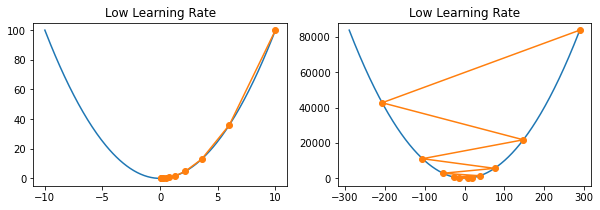

In [66]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        plt.title("Low Learning Rate")
        n = max(abs(min(result)), abs(max(result)))  # Finding Max val in axis
        f_line = tf.range(-n, n, 0.1)         # Generating Smooth x axis range 
        plt.plot(f_line, [f(x) for x in f_line])  # Generate & plot function 
        plt.plot(result, [f(x) for x in result], marker='o')  # Plot the weight updates locations

plot_gd_update([res_low_lr, res_high_lr])

### 1.2 Non-Convex Case

* $ f(x) = x*cos(cx) $

* It has many local minima -> depending on learning rate we can end up in any local minima

In [67]:
c = tf.constant(0.15*np.pi)
f = lambda x : x*tf.cos(c*x)
gradf = lambda x : tf.cos(c * x) - c * x * tf.sin(c * x)

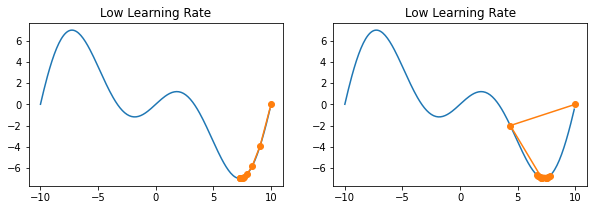

In [69]:
plot_gd_update([grad_desc(0.2, 10), grad_desc(1.2, 10)])

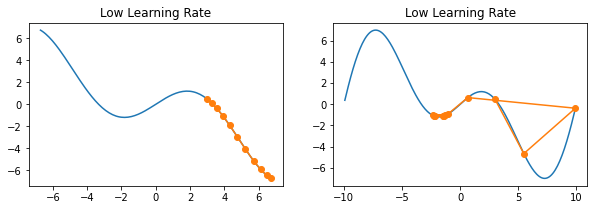

In [72]:
# Different solution with different initial point and solution unstable
plot_gd_update([grad_desc(0.2, 3), grad_desc(2, 3)])

## Summary

* Gradient Descent approach decreases a function through which we can find the optimal value of any function (loss function)

* Due to first order approximation in gradient calculation, the step size is important parameter in deciding the above behavior

* If low learning rate -> we will always encounter dec in function in each step -> bcos higher order terms vanish

* With high learning rate, high order terms cant be ignored -> grad desc doesnt always guarantee dec in function values

* Convex function -> no local minima -> high learning rates shall oscillate but can converge to optima